In [29]:
import mbuild as mb

In [30]:
pps = mb.load("c1ccc(S)cc1", smiles=True)

In [1]:
import gsd.hoomd
import numpy as np
import matplotlib.pyplot as plt
import cmeutils
#TODO: get atoms' molecule indicies
#TODO: count peaks in LJ force magnitudes
#TODO: make some pretty charts about it
#TODO: e.g., make a linear force-magnitude line for each molecule end-to-end to show spikes of contact

In [2]:
i = 0
with gsd.hoomd.open('detanglement-start.gsd','rb') as f:
    
    for frame in f:
        i+=1
        print(frame.log['particles/md/pair/LJ/forces'])
print(i)

/home/rainier/anaconda3/envs/aniso-mapping/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


[[ 0.79177696  0.08245821 -1.37645273]
 [ 0.04948046  0.02762705 -0.11553329]
 [-0.02331074  0.04050729  0.02572389]
 ...
 [ 0.07370726 -0.06605694  0.01690866]
 [ 0.19387646 -0.14527304  0.05983317]
 [ 2.96970257 -0.83728034  0.48063249]]
[[ 0.79122216  0.08331406 -1.37383288]
 [ 0.04918952  0.02741713 -0.11487355]
 [-0.02332621  0.04050629  0.02567079]
 ...
 [ 0.07390322 -0.06649412  0.01697806]
 [ 0.19403244 -0.14594564  0.06025044]
 [ 2.97031197 -0.84527888  0.48508382]]
[[ 0.79066056  0.08417033 -1.37121998]
 [ 0.04890069  0.02720964 -0.11421858]
 [-0.0233414   0.04050455  0.02561744]
 ...
 [ 0.07410002 -0.06693508  0.01704834]
 [ 0.19419916 -0.14662719  0.06067045]
 [ 2.97098389 -0.85329613  0.48957964]]
[[ 0.7900926   0.08502584 -1.36861751]
 [ 0.04861438  0.02700488 -0.1135693 ]
 [-0.0233563   0.04050209  0.0255639 ]
 ...
 [ 0.07429736 -0.06737921  0.0171194 ]
 [ 0.19437649 -0.14731682  0.0610926 ]
 [ 2.97171973 -0.86131994  0.49411329]]
[[ 0.78951808  0.08588042 -1.3660258 ]
 

[[ 0.03266595 -0.00930891 -0.02275364]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [ 1.10354455 -1.13442683 -0.83645335]
 [-5.35890639  3.81238418 -1.6806418 ]
 [ 4.0873636  -0.91594697  3.30576467]]
[[ 0.03251138 -0.00931707 -0.02262844]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [ 1.08787862 -1.11123259 -0.82973386]
 [-5.39859219  3.83466304 -1.69009253]
 [ 4.09634004 -0.91470937  3.31258647]]
[[ 0.03235687 -0.00932467 -0.02250333]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [ 1.07187739 -1.08791452 -0.82275929]
 [-5.43883586  3.85690084 -1.69948574]
 [ 4.10535996 -0.91346188  3.31944078]]
[[ 0.03220243 -0.00933172 -0.02237832]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [ 1.05553689 -1.06447462 -0.81552559]
 [-5.47963799  3.87909511 -1.70882109]
 [ 4.1144228  -0.91220449  3.3263271 ]]
[[ 0.03204808 -0.00933821 -0.02225342]
 

[[  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 ...
 [-15.31718521   6.1567569    6.42630978]
 [-12.22143277   2.68454941  -1.4782141 ]
 [  7.44861381   0.54403397   5.05753636]]
[[  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 ...
 [-15.3250784    6.15232787   6.41657406]
 [-12.18192156   2.66930106  -1.47331872]
 [  7.4552788    0.54559168   5.05954816]]
[[  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 ...
 [-15.3328014    6.14781445   6.40678398]
 [-12.14241619   2.65409211  -1.46839806]
 [  7.46193183   0.54715343   5.06154345]]
[[  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 ...
 [-15.34035714   6.14321623   6.39693893]
 [-12.10290961   2.63891969  -1.46345201]
 [  7.46857

In [3]:
final_forces = frame.log['particles/md/pair/LJ/forces']

In [4]:
force_magnitudes = np.sum(np.abs(final_forces), axis=1)
print(force_magnitudes.shape)
print(max(force_magnitudes))

(6000,)
105.41795555958052


Text(0.5, 1.0, 'force magnitude histogram')

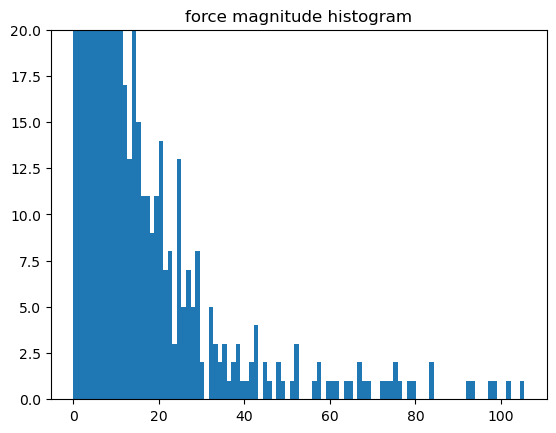

In [5]:
plt.hist(force_magnitudes, bins=100)
plt.ylim(0,20)
plt.title('force magnitude histogram')

In [7]:
mol_cluster = cmeutils.gsd_utils.get_molecule_cluster(snap=frame)

In [13]:
mol_cluster.shape

(6000,)

In [18]:
forces_per_molecule = np.asarray([force_magnitudes[mol_cluster==idx] for idx in np.unique(mol_cluster)])

/tmp/ipykernel_156487/579887858.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(molecule), alpha=0.2)


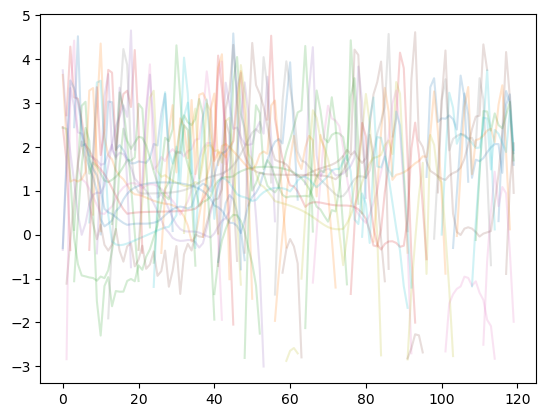

In [45]:
plt.figure()
for molecule in forces_per_molecule:
    plt.plot(np.log(molecule), alpha=0.2)

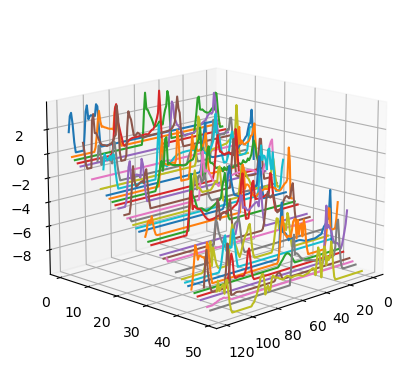

In [150]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

for i, molecule in enumerate(forces_per_molecule):
    if not np.sum(molecule) <= 0:
        ax.plot(range(molecule.size), i*np.ones_like(molecule), np.log(molecule+1) - i/5, alpha=1)
ax.view_init(elev=15, azim=45, roll=0)

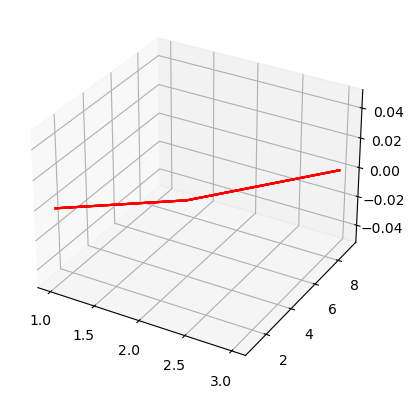

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

datasets = [{"x":[1,2,3], "y":[1,4,9], "z":[0,0,0], "colour": "red"} for _ in range(6)]

for dataset in datasets:
    ax.plot(dataset["x"], dataset["y"], dataset["z"], color=dataset["colour"])

plt.show()